In [1]:
import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

### Preprocessing
* Set seed for reproducability
* Load dataset into numpy arrays and shuffle it
* Split dataset into 80% train, 20% test

In [2]:
numpy.random.seed(7)

dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
numpy.random.shuffle(dataset)

In [3]:
split_ratio = 0.8

X_train = dataset[:int(len(dataset)*split_ratio), 0:8]
X_test = dataset[int(len(dataset)*split_ratio):, 0:8]
Y_train = dataset[:int(len(dataset)*split_ratio), 8]
Y_test = dataset[int(len(dataset)*split_ratio):, 8]
print(X_train)
print()
print(Y_train)

[[1.00e+00 9.00e+01 6.20e+01 ... 2.72e+01 5.80e-01 2.40e+01]
 [7.00e+00 1.81e+02 8.40e+01 ... 3.59e+01 5.86e-01 5.10e+01]
 [1.30e+01 1.52e+02 9.00e+01 ... 2.68e+01 7.31e-01 4.30e+01]
 ...
 [1.10e+01 1.38e+02 7.40e+01 ... 3.61e+01 5.57e-01 5.00e+01]
 [1.00e+00 1.06e+02 7.60e+01 ... 3.75e+01 1.97e-01 2.60e+01]
 [1.00e+01 9.20e+01 6.20e+01 ... 2.59e+01 1.67e-01 3.10e+01]]

[0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 

### Functions
1. Find the distances between `x` and all other nodes, store them in `distances` (keep their indexes)
2. Sort the distance array on the distances
3. Filter out the k nearest neighbours
4. Find the class prediction for each neighbour and add them to `preds_for_nn`
5. Return the prediction that occurs most frequent

In [33]:
def distance(one, two):
    return numpy.linalg.norm(one - two)


def shortestDistanceWithK(x, x_train, y_train, k):
    distances = [(i, distance(x, x_train[i])) for i in range(len(x_train))]
    distances.sort(key=lambda z: z[1])
    neighbours = distances[:k]
    
    preds_for_nn = [y_train[distance[0]] for distance in neighbours]
    (predictions, pred_counts) = numpy.unique(preds_for_nn, return_counts = True)
    most_voted = numpy.argmax(pred_counts)

    return predictions[most_voted]
    

### Test data
* Calculate shortest distance and predict if diabetes or not
* Add results to correct counter
* Add the accuracy to the accuracies array
* Plot the accuracy data

|       | Positive | Negative |
|-------|----------|----------|
| True  | TP       | TN       |
| False | FP       | FN       |

In [32]:
accuracies = []
number_of_k = 10

for k in tqdm_notebook(range(1, number_of_k)):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    print("="*48)
    print(" "*20 + f"K = {k}")
    print("="*48)
    
    for i in range(len(X_test)):
        result = ""
        x = X_test[i]
        y = Y_test[i]

        prediction = shortestDistanceWithK(x, X_train, Y_train, k)

        if y == 1 and prediction == 1:
            TP += 1
            result = "True Positive"
        if y == 0 and prediction == 0:
            TN += 1
            result = "True Negative"
        if y == 1 and prediction == 0:
            FN += 1
            result = "False Negative"
        if y == 0 and prediction == 1:
            FP += 1
            result = "False Positive"
        
        print(f"y^ = {float(prediction)} \t y = {y} \t {result}")
        
    accuracy = ((TP + TN) / (TP + TN + FP + FN))  
    print("\n" + f"Correct: {TP + TN}, Wrong: {FP + FN}, Accuracy: {(accuracy * 100):.4g}%" + "\n")
    accuracies.append([accuracy, k])

                    K = 1
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 T

y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	

y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 

y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive

Correct: 110, Wrong: 44, Accuracy: 71.43%

                    K = 6
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0

y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 1.0 	 y 

y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 1.0 	 True Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 1.0 	 y = 0.0 	 False Positive
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 0.0 	 True Negative
y^ = 0.0 	 y = 1.0 	 False Negative
y^ = 0.0 	 y = 

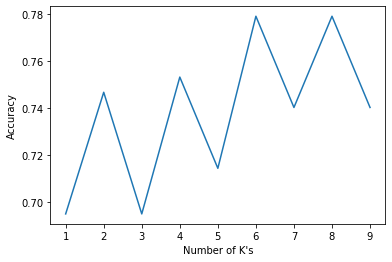

In [34]:
x_values = [accuracy[1] for accuracy in accuracies]
y_values = [accuracy[0] for accuracy in accuracies]

plt.plot(x_values, y_values)
# plt.xticks(x_values)
plt.xlabel("Number of K's")
plt.ylabel("Accuracy")
# plt.savefig("./images/hyperparameter_500_k")
plt.show()

In [ ]:
accuracy = accuracy * 100
recall = (TP / (TP + FN)) * 100
precision = (TP / (TP + FP)) * 100
f1 = ((2 * TP) / (2 * TP + FP + FN)) * 100

print(f"Accuracy: {accuracy:.4g}%")
print(f"Recall: {recall:.4g}%")
print(f"Precision: {precision:.4g}%")
print(f"F1: {f1:.4g}%")

| K       | Accuracy   | Recall   | Precision   | F1       |
|:-------:|:----------:|:--------:|:-----------:|:--------:|
| K = 1   | 69.48%     | 58.33%   | 50.91%      | 54.37%   |
| K = 3   | 69.48%     | 54.17%   | 50.98%      | 52.53%   |
| K = 6   | 77.92%     | 54.17%   | 68.42%      | 60.47%   |
